# Kings County Housing Prices

In [163]:
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

In [164]:
from sklearn.preprocessing import StandardScaler

In [358]:
pd.set_option('display.max_rows', None)

Import data into a dataframe and view head.

In [165]:
kings_county_df = pd.read_csv("data/kc_house_data_train.csv")
kings_county_df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


Check descriptive stats and info about each column

In [166]:
kings_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   price          17290 non-null  float64
 4   bedrooms       17290 non-null  int64  
 5   bathrooms      17290 non-null  float64
 6   sqft_living    17290 non-null  int64  
 7   sqft_lot       17290 non-null  int64  
 8   floors         17290 non-null  float64
 9   waterfront     17290 non-null  int64  
 10  view           17290 non-null  int64  
 11  condition      17290 non-null  int64  
 12  grade          17290 non-null  int64  
 13  sqft_above     17290 non-null  int64  
 14  sqft_basement  17290 non-null  int64  
 15  yr_built       17290 non-null  int64  
 16  yr_renovated   17290 non-null  int64  
 17  zipcode        17290 non-null  int64  
 18  lat   

In [167]:
kings_county_df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


- Convert date to DateTime Object
- Took count of ID, if id appeared more than once, sold more than once.
- Drop Unnamed Column and ID: Seems irrelevant
- Drop long/lat, I don't think i can think of any good combination that isn't explained by zip code
- Convert zipcode to string

In [168]:
kings_county_df['date'] = pd.to_datetime(kings_county_df['date'].str.slice(0,8),format="%Y-%m-%d")
dictNumTimesSold = dict(kings_county_df.groupby('id').id.count().sort_values())
kings_county_df['num_times_sold'] = kings_county_df['id'].map(dictNumTimesSold)
kings_county_df.drop(labels =['Unnamed: 0', 'id', 'lat', 'long'], axis=1, inplace=True)
kings_county_df['zipcode'] = kings_county_df['zipcode'].apply(str)


In [169]:
kings_county_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,num_times_sold
0,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,2390,7700,1
1,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,2370,6283,1
2,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,3710,9685,1
3,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,4050,14226,1
4,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,2250,4050,1


View extreme numbers and address accordingly. Saw a bedroom of 33 and it looks like a typo so set it to 3 bedrooms. Saw few bathrooms/bedrooms of 0 and it seems outrageous and since they are so few, I decided to drop them.

In [170]:
kings_county_df.query("bedrooms == 33")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,num_times_sold
8597,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,1330,4700,1


In [171]:
kings_county_df.at[8597,'bedrooms'] = 3

In [172]:
kings_county_df.query("bedrooms == 0")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,num_times_sold
483,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,2520,8050,1
1120,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,2360,4000,1
2430,2014-10-29,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,1920,224341,1
3032,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,1060,7200,1
3609,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,2500,8751,1
5424,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,1470,1399,1
6409,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,1430,1650,1
9286,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,4740,35061,1
10067,2014-09-26,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,1620,22850,1
10074,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,1810,5685,1


In [173]:
kings_county_df.query("bathrooms == 0")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,num_times_sold
483,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,2520,8050,1
1120,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,2360,4000,1
3032,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,1060,7200,1
5424,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,1470,1399,1
9060,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,1160,42882,1
9286,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,4740,35061,1
10067,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,1620,22850,1
12982,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,1690,19290,1


In [174]:
kings_county_df.query("bathrooms == .5")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,num_times_sold
4622,2014-08-14,255000.0,1,0.5,880,1642,1.0,0,0,3,6,500,380,1910,0,98126,1410,2992,1
7093,2015-01-14,109000.0,2,0.5,580,6900,1.0,0,0,3,5,580,0,1941,0,98118,1570,5040,1
12674,2014-12-12,312500.0,4,0.5,2300,5570,2.0,0,0,3,8,2300,0,1996,0,98092,1820,6371,1


In [175]:
kings_county_df = kings_county_df[(kings_county_df.bathrooms != 0) & (kings_county_df.bedrooms != 0) & (kings_county_df.bathrooms >= 1)]


Check for NAs

In [176]:
kings_county_df.isna().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
sqft_living15     0
sqft_lot15        0
num_times_sold    0
dtype: int64

Convert waterfront to boolean type

In [177]:
kings_county_df.waterfront.value_counts()

0    17088
1      134
Name: waterfront, dtype: int64

In [178]:
kings_county_df.waterfront = kings_county_df.waterfront.astype(bool)

In [179]:
kings_county_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17222 entries, 0 to 17289
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            17222 non-null  datetime64[ns]
 1   price           17222 non-null  float64       
 2   bedrooms        17222 non-null  int64         
 3   bathrooms       17222 non-null  float64       
 4   sqft_living     17222 non-null  int64         
 5   sqft_lot        17222 non-null  int64         
 6   floors          17222 non-null  float64       
 7   waterfront      17222 non-null  bool          
 8   view            17222 non-null  int64         
 9   condition       17222 non-null  int64         
 10  grade           17222 non-null  int64         
 11  sqft_above      17222 non-null  int64         
 12  sqft_basement   17222 non-null  int64         
 13  yr_built        17222 non-null  int64         
 14  yr_renovated    17222 non-null  int64         
 15  zi

Created a few new columns: <br>
    
    - Age as in age of the house
    - Converted yr_built to a datetime obj
    - Created a bool column for if a house was renovated
    - Created a column for the month the house was sold
    - Created a column for the year the house was sold
    - Created a column for the season the house was sold
    

In [180]:
kings_county_df['age'] = 2021 - kings_county_df.yr_built
kings_county_df.yr_built = pd.to_datetime(kings_county_df.yr_built, format="%Y")
kings_county_df['is_renovated'] = np.where(kings_county_df['yr_renovated'] > 0, 1, 0)
kings_county_df['month_sold'] = kings_county_df['date'].dt.month
kings_county_df['year_sold'] = kings_county_df['date'].dt.year

In [181]:
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
#{1: Winter, 2: Spring, 3: Summer, 4: Fall}
month_to_season = dict(zip(range(1,13), seasons))
kings_county_df['season_sold'] = kings_county_df.month_sold.map(month_to_season)

In [182]:
conditions = [(kings_county_df['grade'] <= 4),
              (kings_county_df['grade'] <= 8),
             (kings_county_df['grade'] <= 13)]
choices = ['low','medium','high']
kings_county_df['grade_cat'] = np.select(conditions, choices)

In [183]:
kings_county_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,num_times_sold,age,is_renovated,month_sold,year_sold,season_sold,grade_cat
0,2014-10-06,365000.0,4,2.25,2070,8893,2.0,False,0,4,8,2070,0,1986-01-01,0,98058,2390,7700,1,35,0,10,2014,4,medium
1,2014-08-21,865000.0,5,3.00,2900,6730,1.0,False,0,5,8,1830,1070,1977-01-01,0,98115,2370,6283,1,44,0,8,2014,3,medium
2,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,False,2,3,11,3770,0,1997-01-01,0,98006,3710,9685,1,24,0,8,2014,3,high
3,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,False,2,3,12,4560,0,1990-01-01,0,98034,4050,14226,1,31,0,3,2015,2,high
4,2014-07-14,711000.0,3,2.50,2550,5376,2.0,False,0,3,9,2550,0,2004-01-01,0,98052,2250,4050,1,17,0,7,2014,3,high


View descriiptive stats again and see for any extreme values

In [184]:
kings_county_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,num_times_sold,age,is_renovated,month_sold,year_sold,season_sold
count,1.722200e+04,17222.000000,17222.000000,17222.000000,1.722200e+04,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000,17222.000000
mean,5.416820e+05,3.377831,2.117350,2085.476309,1.522804e+04,1.491290,0.237951,3.409012,7.661770,1792.348798,293.127511,83.790733,1989.506329,12849.133724,1.013239,50.127976,0.041981,6.570143,2014.323133,2.589653
std,3.735401e+05,0.904038,0.766618,918.486549,4.234536e+04,0.538711,0.774457,0.650225,1.167142,828.237028,443.674869,400.296888,684.637237,27192.749721,0.114299,29.327414,0.200552,3.116021,0.467687,1.024441
min,7.800000e+04,1.000000,1.000000,390.000000,5.720000e+02,1.000000,0.000000,1.000000,4.000000,390.000000,0.000000,0.000000,399.000000,659.000000,1.000000,6.000000,0.000000,1.000000,2014.000000,1.000000
25%,3.230000e+05,3.000000,1.750000,1430.000000,5.080250e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,0.000000,1490.000000,5110.250000,1.000000,25.000000,0.000000,4.000000,2014.000000,2.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.638500e+03,1.500000,0.000000,3.000000,7.000000,1570.000000,0.000000,0.000000,1840.000000,7620.000000,1.000000,46.000000,0.000000,6.000000,2014.000000,3.000000
75%,6.475000e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,570.000000,0.000000,2360.000000,10092.750000,1.000000,69.000000,0.000000,9.000000,2015.000000,3.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,6210.000000,858132.000000,2.000000,121.000000,1.000000,12.000000,2015.000000,4.000000


In [185]:
kings_county_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'num_times_sold', 'age', 'is_renovated', 'month_sold',
       'year_sold', 'season_sold', 'grade_cat'],
      dtype='object')

In [369]:
continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors',  'sqft_above', 'sqft_basement',   
       'sqft_living15', 'sqft_lot15', 'age']

categorical = ['waterfront','condition','grade','lat', 'long',
               'is_renovated','month_sold','year_sold','view']

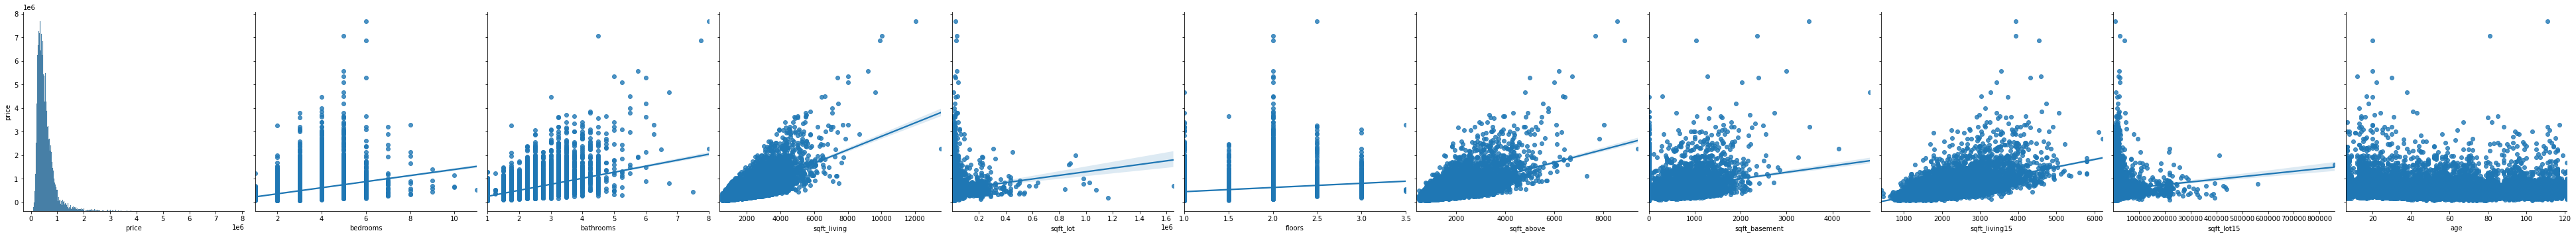

In [187]:
sns.pairplot(data = kings_county_df, y_vars="price", x_vars=continuous, height=5, kind='reg')



In [188]:
kings_county_df.month_sold.unique()

array([10,  8,  3,  7,  5,  4,  1,  6,  2,  9, 11, 12])

In [189]:
#alpha = .05
samples = kings_county_df.groupby('month_sold')['price'].apply(list)

stats.f_oneway(*samples)


F_onewayResult(statistic=2.574900295391838, pvalue=0.0029034481658880627)

In [190]:
kings_county_df.year_sold.unique()

array([2014, 2015])

In [191]:
#alpha = .05

samples = kings_county_df.groupby('year_sold')['price'].apply(list)
stats.ttest_ind(*samples)

Ttest_indResult(statistic=0.2621578389580436, pvalue=0.7932028923279988)

In [192]:
kings_county_df.season_sold.unique()

array([4, 3, 2, 1])

In [193]:
#alpha = .05
samples = kings_county_df.groupby('season_sold')['price'].apply(list)

stats.f_oneway(*samples)

F_onewayResult(statistic=6.58100511680727, pvalue=0.00019286653060448332)

In [194]:
kings_county_df.is_renovated.unique()

array([0, 1])

In [195]:
#alpha = .05

stats.ttest_ind(kings_county_df.query("is_renovated == True")['price'], kings_county_df.query("is_renovated == False")['price'])



Ttest_indResult(statistic=15.568881279590324, pvalue=2.7771993459476847e-54)

In [196]:
kings_county_df.waterfront.unique()

array([False,  True])

In [197]:
#alpha = .05

stats.ttest_ind(kings_county_df.query("waterfront == True")['price'], kings_county_df.query("waterfront == False")['price'])



Ttest_indResult(statistic=38.39269496881404, pvalue=1.677044845201236e-309)

In [198]:
kings_county_df.condition.unique()

array([4, 5, 3, 2, 1])

In [199]:
#alpha = .05
samples = kings_county_df.groupby('condition')['price'].apply(list)
stats.f_oneway(*samples)

F_onewayResult(statistic=27.574529751403393, pvalue=7.448680911187518e-23)

In [200]:
kings_county_df.grade.unique()

array([ 8, 11, 12,  9,  7,  6, 10,  5, 13,  4])

In [201]:
#alpha = .05
samples = kings_county_df.groupby('grade')['price'].apply(list)

stats.f_oneway(*samples)

F_onewayResult(statistic=2145.209220555704, pvalue=0.0)

In [202]:
samples = kings_county_df.groupby('grade_cat')['price'].apply(list)

stats.f_oneway(*samples)

F_onewayResult(statistic=3960.150473300982, pvalue=0.0)

In [203]:
#alpha = .05

stats.ttest_ind(kings_county_df.query("view == True")['price'],kings_county_df.query("view == False")['price'])



Ttest_indResult(statistic=17.36902796896047, pvalue=5.939060476193163e-67)

In [204]:
kings_county_df.view.unique()

array([0, 2, 3, 4, 1])

In [205]:
samples = kings_county_df.groupby('view')['price'].apply(list)
stats.f_oneway(*samples)

F_onewayResult(statistic=881.3331085455491, pvalue=0.0)

In [367]:
kings_county_df.zipcode.unique()

array(['98058', '98115', '98006', '98034', '98052', '98031', '98007',
       '98199', '98027', '98119', '98122', '98155', '98055', '98118',
       '98014', '98059', '98004', '98053', '98072', '98133', '98092',
       '98074', '98125', '98045', '98106', '98022', '98177', '98008',
       '98002', '98040', '98029', '98042', '98001', '98065', '98056',
       '98144', '98188', '98109', '98010', '98075', '98198', '98030',
       '98105', '98023', '98028', '98112', '98038', '98116', '98103',
       '98178', '98168', '98005', '98077', '98146', '98011', '98126',
       '98108', '98136', '98033', '98003', '98117', '98107', '98019',
       '98102', '98032', '98148', '98166', '98070', '98024', '98039'],
      dtype=object)

In [368]:
kings_county_df.zipcode.nunique()

70

In [364]:
pd.DataFrame(kings_county_df.groupby('zipcode').price.mean()).sort_values(by='price', ascending = False)



,price
zipcode,
98039,2.202790e+06
98004,1.396883e+06
98040,1.183018e+06
98112,1.119458e+06
98102,9.316293e+05
98109,8.759879e+05
98119,8.734432e+05
98105,8.687880e+05
98006,8.510264e+05


In [207]:
#alpha = .05
samples = kings_county_df.groupby('zipcode')['price'].apply(list)
stats.f_oneway(*samples)


F_onewayResult(statistic=166.57692359493055, pvalue=0.0)

In [208]:
#alpha = .05
samples = kings_county_df.groupby('num_times_sold')['price'].apply(list)
stats.f_oneway(*samples)

F_onewayResult(statistic=28.738121869872636, pvalue=8.392386596235142e-08)

<AxesSubplot:>

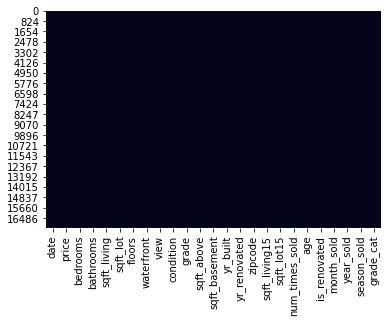

In [209]:
sns.heatmap(kings_county_df.isnull(), cbar=False)

In [210]:
pd.DataFrame(kings_county_df.corr().abs().unstack().sort_values(kind="quicksort",ascending=False).drop_duplicates()>.90).iloc[:10,:]


0
season_sold   season_sold    True
yr_renovated  is_renovated   True
sqft_living   sqft_above    False
month_sold    year_sold     False
sqft_living   grade         False
sqft_above    grade         False
bathrooms     sqft_living   False
sqft_living15 sqft_living   False
              sqft_above    False
              grade         False

In [211]:
kings_county_df.drop(columns = ['yr_renovated','date','yr_built','grade','year_sold'],axis=1, inplace=True)
kings_county_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,num_times_sold,age,is_renovated,month_sold,season_sold,grade_cat
0,365000.0,4,2.25,2070,8893,2.0,False,0,4,2070,0,98058,2390,7700,1,35,0,10,4,medium
1,865000.0,5,3.00,2900,6730,1.0,False,0,5,1830,1070,98115,2370,6283,1,44,0,8,3,medium
2,1038000.0,4,2.50,3770,10893,2.0,False,2,3,3770,0,98006,3710,9685,1,24,0,8,3,high
3,1490000.0,3,3.50,4560,14608,2.0,False,2,3,4560,0,98034,4050,14226,1,31,0,3,2,high
4,711000.0,3,2.50,2550,5376,2.0,False,0,3,2550,0,98052,2250,4050,1,17,0,7,3,high


In [230]:
X = pd.get_dummies(kings_county_df, columns = ['view','grade_cat','season_sold', 'is_renovated', 'condition','zipcode', 'num_times_sold'] , drop_first=True).drop('price', axis=1)
y = kings_county_df['price']


In [233]:
pd.DataFrame(X.corr().abs().unstack().sort_values(kind="quicksort",ascending=False).drop_duplicates()>.90).iloc[:10,:]


0
num_times_sold_2 num_times_sold_2   True
sqft_above       sqft_living       False
condition_3      condition_4       False
sqft_living      bathrooms         False
sqft_living15    sqft_living       False
sqft_above       sqft_living15     False
sqft_lot15       sqft_lot          False
sqft_above       bathrooms         False
                 grade_cat_medium  False
grade_cat_medium sqft_living       False

In [234]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [235]:
lr.coef_

array([-3.22586110e+04,  3.07518044e+04,  4.65281973e+12,  2.37806723e-01,
       -4.46833665e+04,  5.90803993e+05, -4.65281973e+12, -4.65281973e+12,
        2.08218041e+01, -1.30273166e-01,  3.20391123e+02, -1.04935432e+03,
        7.29237655e+04,  7.55998927e+04,  1.49774603e+05,  3.48302854e+05,
       -4.11530871e+04, -7.74975274e+04,  1.92141735e+04,  7.14783724e+02,
       -3.07214457e+03,  3.96320401e+04,  1.14266535e+05,  1.19268429e+05,
        1.39488401e+05,  1.83758234e+05,  1.56483013e+04,  6.73404910e+02,
        8.12986291e+05,  3.13020767e+05,  2.82226544e+05,  2.67704918e+05,
        2.60944999e+05,  5.50516622e+04,  1.29592462e+05,  8.96608154e+04,
        8.00328233e+04, -1.16261714e+04, -2.31750645e+04,  1.43702086e+05,
        1.74862892e+05,  1.27725155e+05,  2.21066769e+05,  2.01619391e+03,
        1.76676875e+04,  2.49155032e+04,  3.66346664e+05,  2.12371326e+05,
        2.20722579e+04,  1.35420130e+06,  5.21799557e+05,  5.63203711e+03,
        9.57126013e+04,  

In [236]:
lr.intercept_

-155707.28541981184

In [237]:
lr.score(X,y)

0.8031500400384383

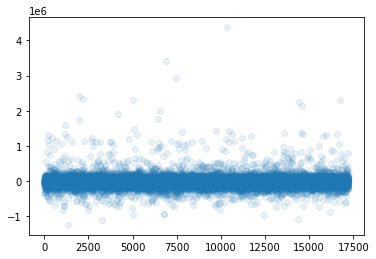

In [238]:
y_hat = lr.predict(X)
resid = y - y_hat
plt.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1)

In [239]:
sum(resid)

-245.70484961895272

In [240]:
metrics.r2_score(y, lr.predict(X))

0.8031500400384383

In [241]:
avg_price = np.mean(y)
num = len(y)

metrics.r2_score(y, avg_price * np.ones(num))

0.0

In [242]:
metrics.r2_score(y, (avg_price + 1) * np.ones(num))

-7.1671557577701606e-12

In [243]:
metrics.mean_absolute_error(y, lr.predict(X))

97565.92160166356

In [244]:
metrics.mean_squared_error(y, lr.predict(X))

27465321610.446407

In [108]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [341]:
lr_rfe = LinearRegression()
num_features = 80
select = RFE(lr_rfe, n_features_to_select=num_features)
ss = StandardScaler()
ss.fit(X)

wine_scaled = ss.transform(X)
select.fit(X=X, y=y)

RFE(estimator=LinearRegression(), n_features_to_select=80)

In [342]:
select.support_

array([ True,  True,  True, False,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False])

In [343]:
columns = pd.DataFrame(select.ranking_).sort_values(by=0)[:num_features].T.columns

subset = []
for x in columns:
    subset.append(X.iloc[:,x].name)

In [344]:
df_just_testing = X[subset]

In [345]:
lr = LinearRegression()
lr.fit(df_just_testing,y)


LinearRegression()

In [346]:
lr.coef_

array([-3.19607270e+04,  5.04486345e+05,  3.72640496e+05,  5.70776473e+05,
       -3.78650485e+04,  1.27923497e+05,  1.72406295e+05,  1.82801355e+05,
        1.62832284e+05,  6.48797304e+04,  7.80016529e+04,  3.40830108e+04,
        8.25664882e+04,  4.36594669e+04,  1.85422394e+05,  2.38018652e+05,
        9.42818077e+04,  5.26005241e+05,  1.35434048e+06,  1.95401421e+04,
        1.45115012e+05,  3.80940958e+05,  1.33320456e+05,  5.40105662e+05,
        3.72936515e+04,  3.72098184e+04,  2.40608430e+05,  6.66179890e+04,
        5.72555099e+04,  1.58212028e+05,  6.73704821e+04,  9.73071277e+04,
        3.10950629e+05,  4.12630267e+05,  2.69461264e+05,  2.07950347e+05,
        2.07125542e+05,  3.70835831e+05,  5.41289143e+05,  1.79473630e+05,
        3.44402732e+05,  3.10497822e+05,  3.49863157e+05,  6.75199533e+05,
        1.79736092e+05,  3.62542097e+05,  2.08067239e+05,  1.05712786e+05,
        3.57284239e+05, -3.26336111e+04, -8.14679550e+04,  2.37526128e+04,
        7.92580719e+04, -

In [347]:
lr.score(df_just_testing,y)

0.801937678555086

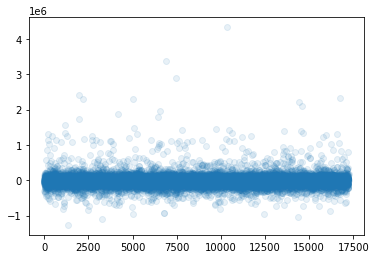

In [348]:
y_hat = lr.predict(df_just_testing)
resid = y - y_hat
plt.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1)

In [349]:
metrics.r2_score(y, lr.predict(df_just_testing))

0.801937678555086

In [350]:
avg_price = np.mean(y)
num = len(y)

metrics.r2_score(y, avg_price * np.ones(num))

0.0

In [351]:
metrics.r2_score(y, (avg_price + 1) * np.ones(num))

-7.1671557577701606e-12

In [352]:
metrics.mean_absolute_error(y, lr.predict(df_just_testing))

98089.89554069679

In [353]:
metrics.mean_squared_error(y, lr.predict(df_just_testing))

27634475305.244667